In [30]:
import yfinance as yf
import datetime
import pandas as pd
import seaborn

Get AAPL Data

In [24]:
aapl = yf.Ticker("aapl").history(period = "5y")

/Users/aman2/anaconda3/envs/ollama_lang_chrome_test/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Find how many of todays stocks the price is in terms of

In [25]:
stock_split_ratio = aapl["Stock Splits"]
stock_split_ratio[(stock_split_ratio == 0)] = 1
stock_split_ratio = pd.Series.cumprod(stock_split_ratio)
aapl["Stock Ratio From Start"] = stock_split_ratio

/var/folders/b2/kj73pqdx4sxdntx6q_0yhbqh0000gp/T/ipykernel_20480/3800500856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_split_ratio[(stock_split_ratio == 0)] = 1


Find Adjusted Close

In [28]:
aapl["Adjusted Close"] = aapl["Close"]/aapl["Stock Ratio From Start"]
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock Ratio From Start,Adjusted Close
Date,,,,,,,,,
2019-02-11 00:00:00-05:00,41.219945,41.258503,40.786177,40.829552,83973600,0.0,1.0,1.0,40.829552
2019-02-12 00:00:00-05:00,40.991011,41.207893,40.894616,41.181385,89134000,0.0,1.0,1.0,41.181385
2019-02-13 00:00:00-05:00,41.301878,41.564547,40.947634,41.010288,89960800,0.0,1.0,1.0,41.010288
2019-02-14 00:00:00-05:00,40.897029,41.270548,40.817505,41.159698,87342800,0.0,1.0,1.0,41.159698
2019-02-15 00:00:00-05:00,41.268138,41.376579,40.906665,41.068123,98507200,0.0,1.0,1.0,41.068123
...,...,...,...,...,...,...,...,...,...
2024-02-05 00:00:00-05:00,188.149994,189.250000,185.839996,187.679993,69668800,0.0,1.0,4.0,46.919998
2024-02-06 00:00:00-05:00,186.860001,189.309998,186.770004,189.300003,43490800,0.0,1.0,4.0,47.325001
2024-02-07 00:00:00-05:00,190.639999,191.050003,188.610001,189.410004,53439000,0.0,1.0,4.0,47.352501


<Axes: xlabel='Date', ylabel='Adjusted Close'>

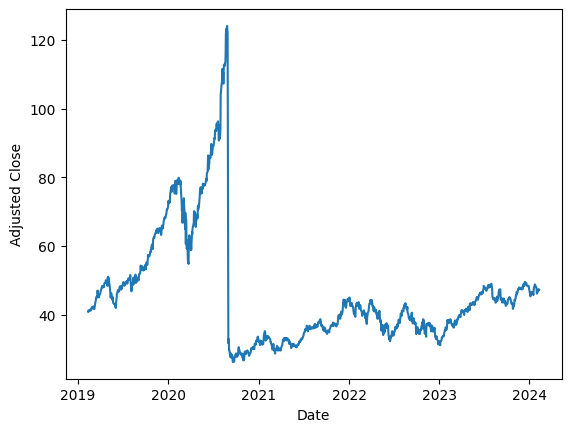

In [34]:
seaborn.lineplot(data = aapl, x = "Date", y = "Close")